In [1]:
#This data was meant to see the cross talk a neigboring tile would pick up from a main cell. The large Scintillating square tile where Hexagons 
#are etched into it was used. The grooves are painted white, and the whole scintillator is covered is ESR reflective wrap. This is different from the Sep 7 data set because the two tiles are now in a different arrangement

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
hep.style.use("CMS")

In [3]:
typeofrun = 'Cosmic'


maincell = 'ch4' # for cosmics
neighbour= 'ch3' #for cosmics
df = pd.read_pickle("Sept9Cosmic.pkl") 

In [4]:
if (typeofrun =='Cosmic'):
    df.eval('%s_P2P_smooth_PE = (1/6.344) *%s_P2P_smooth'%(maincell,maincell), inplace=True)
    df.eval('%s_P2P_smooth_PE = (1/6.327) *%s_P2P_smooth'%(neighbour,neighbour), inplace=True)
    df.eval('time_diff = %s_time_smooth- %s_time_smooth'%(maincell,neighbour), inplace=True)

df.eval('main_amplitude = %s_P2P_smooth_PE'%(maincell), inplace=True)
df.eval('main_time = %s_time_smooth'%(maincell), inplace=True)
df.eval('neighbour_amplitude = %s_P2P_smooth_PE'%(neighbour), inplace=True)
df.eval('neighbour_time = %s_time_smooth'%(neighbour), inplace=True)

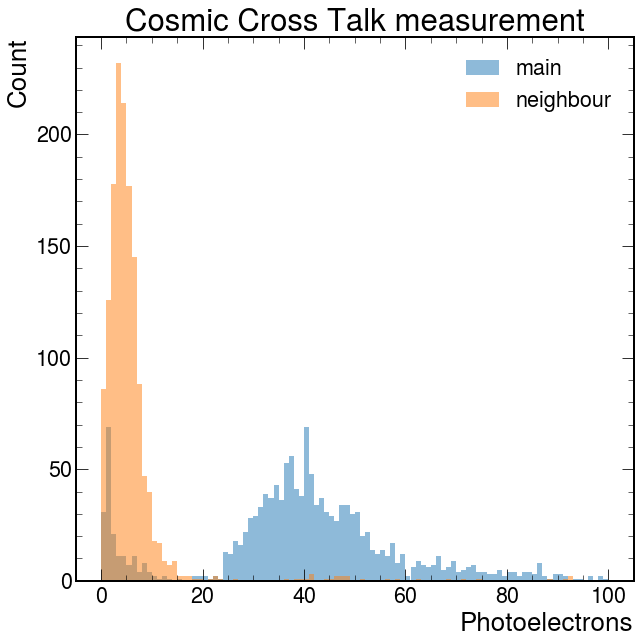

In [5]:
#bins for Cosmic and LED were at 40.
plt.hist(df['main_amplitude'],bins=100,alpha=0.5,range=(0,100),label='main')
plt.hist(df['neighbour_amplitude'],bins=100,alpha=0.5,range=(0,100),label='neighbour')




plt.legend()
plt.xlabel('Photoelectrons')
plt.ylabel('Count')

plt.title('%s Cross Talk measurement'%(typeofrun))
#plt.savefig('cross-talk-measurement_%s.png'%(typeofrun))
plt.show()

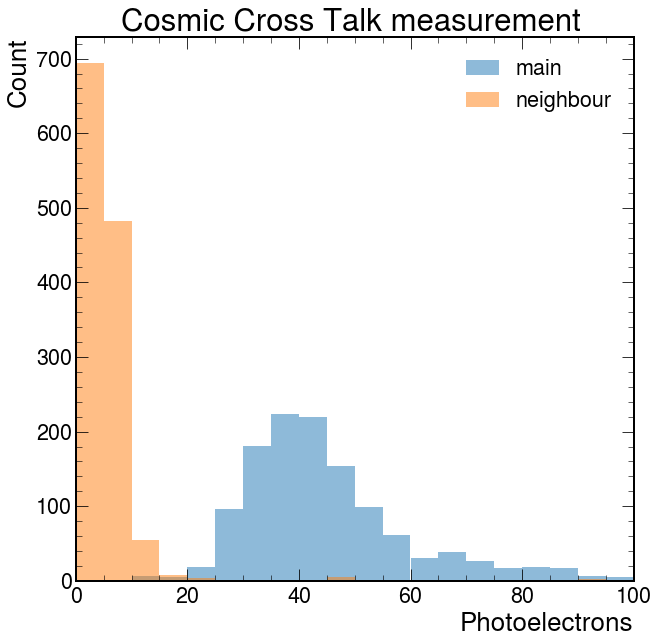

In [6]:
#Same as plot above only this one removes some noise that was recorded on the main SiPM (PE>10).

plt.hist(df.query('main_amplitude > 10')['main_amplitude'],bins=40,alpha=0.5,range=(0,200),label='main')
plt.hist(df.query('main_amplitude> 10')['neighbour_amplitude'],bins=40,alpha=0.5,range=(0,200),label='neighbour')

plt.legend()
plt.xlabel('Photoelectrons')
plt.ylabel('Count')
plt.xlim([0, 100])

plt.title('%s Cross Talk measurement '%(typeofrun))
#plt.savefig('cross-talk-measurement_%s.png'%(typeofrun))
plt.show()

Text(0.5, 1.0, 'Cosmic Main Cell P2P Amplitude ')

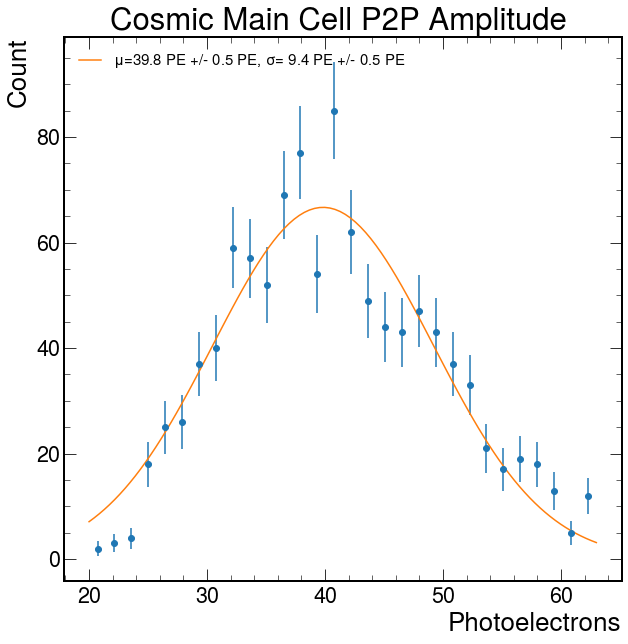

In [7]:
#Plots what the P2P Amplitude of the main cell was.

from scipy.optimize import curve_fit
import numpy as np

hist, bin_edges = np.histogram(df['main_amplitude'],bins=30,range=(20,63))

bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

#amplitude, mean, sigma
p0 = [100.,40.,15]


coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                            #(start,end,line quality keep at 100)
hist_fit = gauss(np.linspace(20, 63, 100), *coeff)
plt.errorbar(bin_centers, y=hist, yerr=np.sqrt(hist),fmt='o')
plt.plot(np.linspace(20,63,100), hist_fit,)
plt.xlabel("Photoelectrons")
plt.ylabel("Count")

plt.legend(['$\mu$=%2.1f PE +/- %2.1f PE, $\sigma$= %2.1f PE +/- %2.1f PE '%(coeff[1],np.sqrt(var_matrix[1][1]),coeff[2],np.sqrt(var_matrix[2][2]))],loc=2,prop={'size': 15})       
plt.title('%s Main Cell P2P Amplitude '%(typeofrun))
#plt.savefig('P2P_Main_Cell_%s.png'%(typeofrun))

Text(0.5, 1.0, 'Cosmic Neighbor Cell P2P Amplitude ')

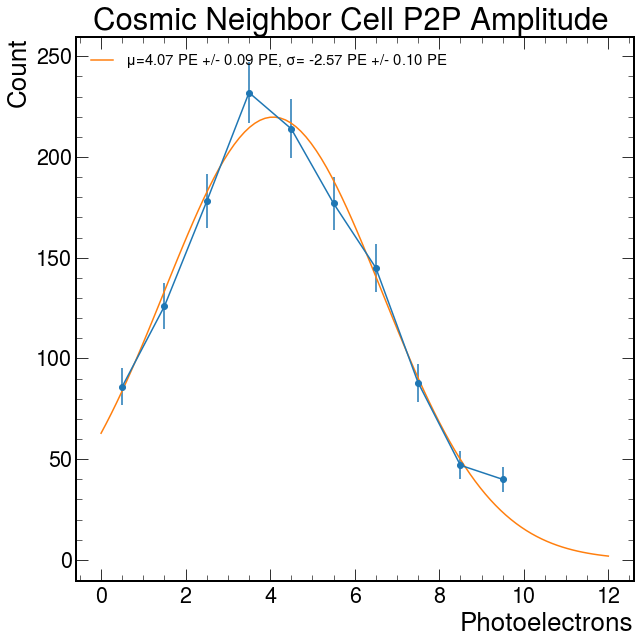

In [8]:
#Plots what the P2P Amplitude of the main cell was.

from scipy.optimize import curve_fit
import numpy as np

hist, bin_edges = np.histogram(df['ch3_P2P_smooth_PE'],bins=10,range=(0,10))

bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

#amplitude, mean, sigma
p0 = [5,40,15]


coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
                            #(start,end,line quality keep at 100)
hist_fit = gauss(np.linspace(0, 12, 100), *coeff)
plt.errorbar(bin_centers, y=hist, yerr=np.sqrt(hist),fmt='-o')
plt.plot(np.linspace(0,12,100), hist_fit,)
plt.xlabel("Photoelectrons")
plt.ylabel("Count")

plt.legend(['$\mu$=%2.2f PE +/- %2.2f PE, $\sigma$= %2.2f PE +/- %2.2f PE '%(coeff[1],np.sqrt(var_matrix[1][1]),coeff[2],np.sqrt(var_matrix[2][2]))],loc=2,prop={'size': 15})       
plt.title('%s Neighbor Cell P2P Amplitude '%(typeofrun))
#plt.savefig('P2P_Neigbor_Cell_%s.png'%(typeofrun))
